# Expectation-Maximization Clustering

Expectation Maximation is a clustering algorithm where it clusters based on the mean and the standard deviation of a region.

### When To Use
* Can be create clusters based on known clusters number.
* Can cluster on elliptical shapes
* Supports mixed membership where a point can belong to multiple clusters on a gradient due its use of probabilities
<br>

### How Does it Work
* The algorithm starts at k arbitrary cluster location points and randomly create a gaussian distribution parameter model
* Calculate the probability of a point belonging to the given k cluster
* The gaussian parameter changes to maximize probability and shift accordingly
* The process ends when the the gaussian centers converges to a stable point
<br>

### Params
* clusters: the number of clusters that will be solved for in the data
<br>

### Results 
* The algorithm will generate clusters based on the above params
<br>

### Limitations
* User has to select a predefined number of clusters
* Algorithm uses a stochastic starting point
* Can be affected by outliers and noise
* Algorithm uses distance formula causing clusters to take a globular shape
    * With arbitrary shaped clusters, algorithm tends to fail

## EM Clustering Using GMM

K-Means clustering optimizes on the means and variation of the clusters. This may ignore larger trends that supercede simple local mean and variation. For this method, the model uses a Gaussian Model to denote the cluster points on a range. The parameters it measures are mean and deviation, but it more forgiving on complex structures such as circles. To achieve this goal, Expectation Maximization occurs to get baseline metrics to use the GMMs to optimize. 
Sources for this notebook can be found [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html)

In [12]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random
sns.set()


## Attempt 1: Aribtrary Shaped Clusters

In [79]:
#Creating an Example Data Set

random.seed(0)

#4 distinct clusters

#Cluster 1 is a region of tight points
cluster_1 = -10 * np.random.rand(100,2) 

#Cluster 2 is the function f(x) = -.01x^2 + .5x + sin(x)+15 where 0 <= x <= 100
cluster_2 = []
for i in range(100):
    random_y = -.01*i**2 +.5 * i + np.sin(i) + 15 
    cluster_2.append([i, random_y])
cluster_2 = np.array(cluster_2)

#Cluster 3 is the function f(x) = -x+50 + .01*x^2 where -45<= x <= 55
cluster_3 = []
for i in range(100):
    x = i - 45
    random_y = -1*x + 50 + .02*x**2  
    cluster_3.append([i, random_y])
cluster_3 = np.array(cluster_3)

#Cluster 4 is a circle defined by (x-60)^2 + (y+25)^2 = 100
cluster_4 = []
for i in range(50):
    x = .4*i +50
    random_y_pos = (100-(x-60)**2)**.5 -25 
    random_y_neg = -1* (100-(x-60)**2)**.5 -25 
    cluster_4.append([x, random_y_pos])
    cluster_4.append([x, random_y_neg])
cluster_4 = np.array(cluster_4)

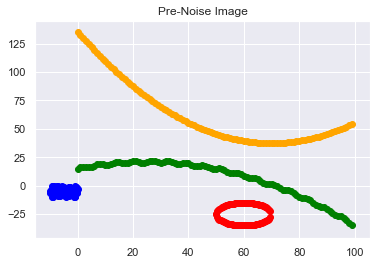

In [80]:
#Pre-Noise Image
fig, ax = plt.subplots()
ax.set_title("Pre-Noise Image")
plt.scatter(cluster_1[ : , 0], cluster_1[ :, 1], color = 'blue')
plt.scatter(cluster_2[ : , 0], cluster_2[ :, 1], color = 'green')
plt.scatter(cluster_3[ : , 0], cluster_3[ :, 1], color = 'orange')
plt.scatter(cluster_4[ : , 0], cluster_4[ :, 1], color = 'red')

In [81]:
#Adding Noise Mask
#Assuming a bivariate normal noise distribution with a mean of 0 and variance of 2
x_noise = np.random.normal(0,2,100)
y_noise = np.random.normal(0,2,100)
noise = []
for i in range(100):
    noise.append([x_noise[i], y_noise[i]])
noise = np.array(noise)

noisy_cluster_1 = cluster_1 + noise
noisy_cluster_2 = cluster_2 + noise
noisy_cluster_3 = cluster_3 + noise
noisy_cluster_4 = cluster_4 + noise


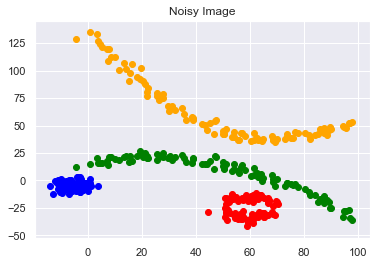

In [82]:
#Post-Noise Image
fig, ax = plt.subplots()
ax.set_title("Noisy Image")
plt.scatter(noisy_cluster_1[ : , 0], noisy_cluster_1[ :, 1], color = 'blue')
plt.scatter(noisy_cluster_2[ : , 0], noisy_cluster_2[ :, 1], color = 'green')
plt.scatter(noisy_cluster_3[ : , 0], noisy_cluster_3[ :, 1], color = 'orange')
plt.scatter(noisy_cluster_4[ : , 0], noisy_cluster_4[ :, 1], color = 'red')

In [83]:
#Creating a data array
noisy_data_array = np.zeros((400,2))
noisy_data_array[0:100, :] = noisy_cluster_1
noisy_data_array[100:200, :] = noisy_cluster_2
noisy_data_array[200:300, :] = noisy_cluster_3
noisy_data_array[300:400, :] = noisy_cluster_4

In [84]:
#Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(noisy_data_array)

Minimum of BIC: 9
Minimum of AIC: 10


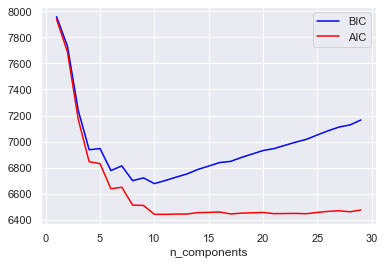

In [85]:
#In order to find the ideal cluster number. The Akaike information criterion (AIC) 
#or the Bayesian information criterion (BIC) has to be minimized
# Improve algorithm in future
MIN_CLUSTERS = 1
MAX_CLUSTERS = 30
n_components = np.arange(MIN_CLUSTERS, MAX_CLUSTERS)

models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(noisy_data_array) for n in n_components]
BIC_data_array = [m.bic(noisy_data_array) for m in models]
AIC_data_array = [m.aic(noisy_data_array) for m in models]

plt.plot(n_components, BIC_data_array, label='BIC', color = 'blue')
plt.plot(n_components, AIC_data_array, label='AIC', color = 'red')
plt.legend(loc='best')
plt.xlabel('n_components');

print("Minimum of BIC: " + str(BIC_data_array.index(min(BIC_data_array))))
print("Minimum of AIC: " + str(AIC_data_array.index(min(AIC_data_array))))

In [86]:
#Given that the revealed number of clusters is 9 clusters for BIC and 20 clusters for AIC.
#Assuming  the 9 clusters with BIC
BIC_cluster = 9

gmm = GaussianMixture(n_components = BIC_cluster)
gmm.fit(noisy_data_array)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=9, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

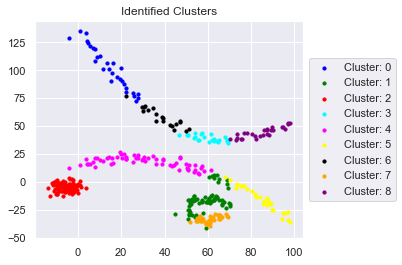

In [87]:
colored_cluster_array = []
for point in noisy_data_array:
    ans = gmm.predict(point.reshape(1,-1))
    colored_cluster_array.append([point, ans.tolist()])
        
color_suite = []
for e in range(9):
    color_e = [i[0].tolist() for i in colored_cluster_array if i[1][0] == e ]
    color_ex = [i[0] for i in color_e]
    color_ey = [i[1] for i in color_e]
    color_suite.append([color_ex, color_ey])
        
fig, ax = plt.subplots()
title = "Identified Clusters"
ax.set_title(title)
color_list = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'copper']
legend_list = []
cluster_list = []
i = 0
for point_array in color_suite:
    leg = ax.scatter(point_array[0], point_array[1], s = 10, color=color_list[i])
    legend_list.append(leg)
    cluster_list.append('Cluster: ' + str(i))
    i+=1
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(legend_list, cluster_list, loc='center left', bbox_to_anchor=(1, 0.5))

In [88]:
#Given that the revealed number of clusters is 9 clusters for BIC and 20 clusters for AIC.
#Assuming  the 20 clusters with AIC
AIC_cluster = 20

gmm = GaussianMixture(n_components = AIC_cluster)
gmm.fit(noisy_data_array)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=20, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

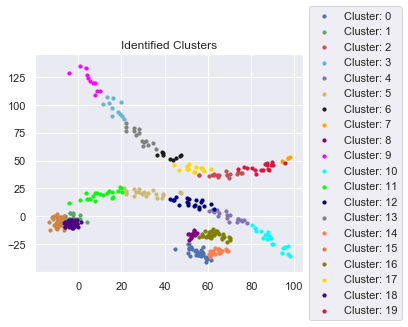

In [89]:
labels = gmm.predict(noisy_data_array)

colored_cluster_array = []
for i in range(len(noisy_data_array)):
    colored_cluster_array.append([noisy_data_array[i], labels[i]])
color_suite = []
for e in range(20):
    color_e = [i[0].tolist() for i in colored_cluster_array if i[1] == e ]
    color_ex = [i[0] for i in color_e]
    color_ey = [i[1] for i in color_e]
    color_suite.append([color_ex, color_ey])
        
fig, ax = plt.subplots()
title = "Identified Clusters"
ax.set_title(title)
color_list = ['b','g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'magenta', 'cyan', 'lime', 
              'navy', 'gray', 'coral', 'peru', 'olive', 'gold', 'indigo', 'crimson']
legend_list = []
cluster_list = []
i = 0
for point_array in color_suite:
    leg = ax.scatter(point_array[0], point_array[1], s = 10, color=color_list[i])
    legend_list.append(leg)
    cluster_list.append('Cluster: ' + str(i))
    i+=1
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(legend_list, cluster_list, loc='center left', bbox_to_anchor=(1, 0.5))


In [90]:
#Known CLusteres
known_cluster = 4

gmm = GaussianMixture(n_components = known_cluster)
gmm.fit(noisy_data_array)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

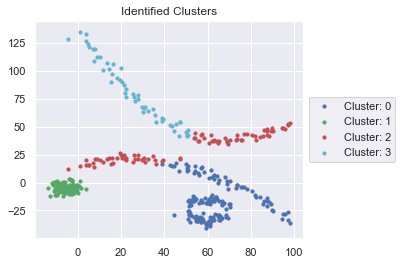

In [91]:
labels = gmm.predict(noisy_data_array)

colored_cluster_array = []
for i in range(len(noisy_data_array)):
    colored_cluster_array.append([noisy_data_array[i], labels[i]])
color_suite = []
for e in range(4):
    color_e = [i[0].tolist() for i in colored_cluster_array if i[1] == e ]
    color_ex = [i[0] for i in color_e]
    color_ey = [i[1] for i in color_e]
    color_suite.append([color_ex, color_ey])
        
fig, ax = plt.subplots()
title = "Identified Clusters"
ax.set_title(title)
color_list = ['b','g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'magenta', 'cyan', 'lime', 
              'navy', 'gray', 'coral', 'peru', 'olive', 'gold', 'indigo', 'crimson']
legend_list = []
cluster_list = []
i = 0
for point_array in color_suite:
    leg = ax.scatter(point_array[0], point_array[1], s = 10, color=color_list[i])
    legend_list.append(leg)
    cluster_list.append('Cluster: ' + str(i))
    i+=1
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(legend_list, cluster_list, loc='center left', bbox_to_anchor=(1, 0.5))


## Attempt 2: Globular Based Clusters

In [92]:
#Creating the Data Set

#4 distinct clusters
cluster_1 = -2 * np.random.rand(100,2)
cluster_2 =  2 * np.random.rand(100,2)
cluster_3 = -1 * np.random.rand(100,2)
cluster_4 =1 + 3 * np.random.rand(100,2)

#offsetting
cluster_1 = np.array([[i[0]-5, i[1]-5] for i in cluster_1])
cluster_2 = np.array([[i[0]+5, i[1]-5] for i in cluster_2])
cluster_3 = np.array([[i[0]-5, i[1]+5] for i in cluster_3])
cluster_4 = np.array([[i[0]+3, i[1]+5] for i in cluster_4])

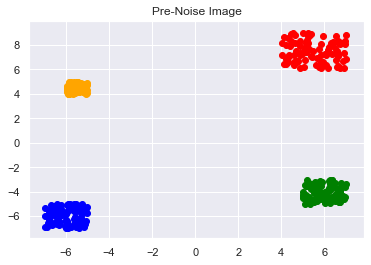

In [93]:
#Pre-Noise Image
fig, ax = plt.subplots()
ax.set_title("Pre-Noise Image")
plt.scatter(cluster_1[ : , 0], cluster_1[ :, 1], color = 'blue')
plt.scatter(cluster_2[ : , 0], cluster_2[ :, 1], color = 'green')
plt.scatter(cluster_3[ : , 0], cluster_3[ :, 1], color = 'orange')
plt.scatter(cluster_4[ : , 0], cluster_4[ :, 1], color = 'red')

In [94]:
#Adding Noise Mask
#Assuming a bivariate normal noise distribution with a mean of 0 and variance of 1
x_noise = np.random.normal(0,1,100)
y_noise = np.random.normal(0,1,100)
noise = []
for i in range(100):
    noise.append([x_noise[i], y_noise[i]])
noise = np.array(noise)

noisy_cluster_1 = cluster_1 + noise
noisy_cluster_2 = cluster_2 + noise
noisy_cluster_3 = cluster_3 + noise
noisy_cluster_4 = cluster_4 + noise


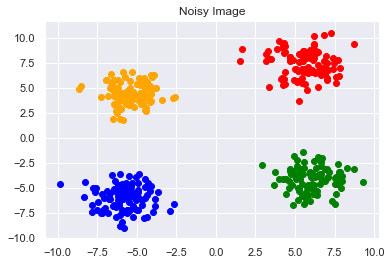

In [95]:
#Post-Noise Image
fig, ax = plt.subplots()
ax.set_title("Noisy Image")
plt.scatter(noisy_cluster_1[ : , 0], noisy_cluster_1[ :, 1], color = 'blue')
plt.scatter(noisy_cluster_2[ : , 0], noisy_cluster_2[ :, 1], color = 'green')
plt.scatter(noisy_cluster_3[ : , 0], noisy_cluster_3[ :, 1], color = 'orange')
plt.scatter(noisy_cluster_4[ : , 0], noisy_cluster_4[ :, 1], color = 'red')

In [96]:
#Creating a data array
noisy_data_array = np.zeros((400,2))
noisy_data_array[0:100, :] = noisy_cluster_1
noisy_data_array[100:200, :] = noisy_cluster_2
noisy_data_array[200:300, :] = noisy_cluster_3
noisy_data_array[300:400, :] = noisy_cluster_4

In [97]:
#Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(noisy_data_array)

Minimum of BIC: 3
Minimum of AIC: 3


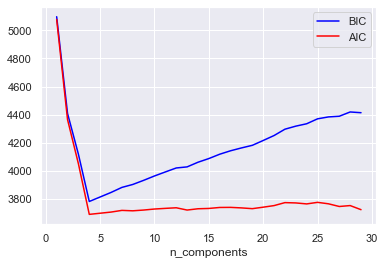

In [98]:
#In order to find the ideal cluster number. The Akaike information criterion (AIC) 
#or the Bayesian information criterion (BIC) has to be minimized
# Improve algorithm in future
MIN_CLUSTERS = 1
MAX_CLUSTERS = 30
n_components = np.arange(MIN_CLUSTERS, MAX_CLUSTERS)

models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(noisy_data_array) for n in n_components]
BIC_data_array = [m.bic(noisy_data_array) for m in models]
AIC_data_array = [m.aic(noisy_data_array) for m in models]

plt.plot(n_components, BIC_data_array, label='BIC', color = 'blue')
plt.plot(n_components, AIC_data_array, label='AIC', color = 'red')
plt.legend(loc='best')
plt.xlabel('n_components');

print("Minimum of BIC: " + str(BIC_data_array.index(min(BIC_data_array))))
print("Minimum of AIC: " + str(AIC_data_array.index(min(AIC_data_array))))

In [99]:
#Given that the revealed number of clusters is 3 clusters for BIC and 3 clusters for AIC.
#Since both data is the same we can do a single trial.
cluster = 3

gmm = GaussianMixture(n_components = cluster)
gmm.fit(noisy_data_array)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

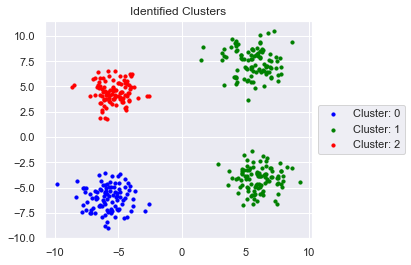

In [100]:
colored_cluster_array = []
for point in noisy_data_array:
    ans = gmm.predict(point.reshape(1,-1))
    colored_cluster_array.append([point, ans.tolist()])
        
color_suite = []
for e in range(3):
    color_e = [i[0].tolist() for i in colored_cluster_array if i[1][0] == e ]
    color_ex = [i[0] for i in color_e]
    color_ey = [i[1] for i in color_e]
    color_suite.append([color_ex, color_ey])
        
fig, ax = plt.subplots()
title = "Identified Clusters"
ax.set_title(title)
color_list = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'copper']
legend_list = []
cluster_list = []
i = 0
for point_array in color_suite:
    leg = ax.scatter(point_array[0], point_array[1], s = 10, color=color_list[i])
    legend_list.append(leg)
    cluster_list.append('Cluster: ' + str(i))
    i+=1
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(legend_list, cluster_list, loc='center left', bbox_to_anchor=(1, 0.5))

In [101]:
#Known CLusteres
known_cluster = 4

gmm = GaussianMixture(n_components = known_cluster)
gmm.fit(noisy_data_array)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

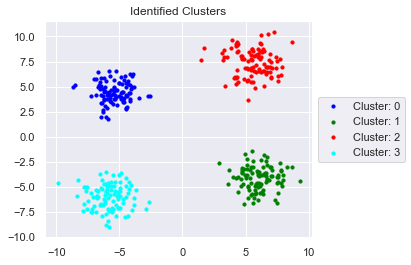

In [102]:
colored_cluster_array = []
for point in noisy_data_array:
    ans = gmm.predict(point.reshape(1,-1))
    colored_cluster_array.append([point, ans.tolist()])
        
color_suite = []
for e in range(4):
    color_e = [i[0].tolist() for i in colored_cluster_array if i[1][0] == e ]
    color_ex = [i[0] for i in color_e]
    color_ey = [i[1] for i in color_e]
    color_suite.append([color_ex, color_ey])
        
fig, ax = plt.subplots()
title = "Identified Clusters"
ax.set_title(title)
color_list = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'copper']
legend_list = []
cluster_list = []
i = 0
for point_array in color_suite:
    leg = ax.scatter(point_array[0], point_array[1], s = 10, color=color_list[i])
    legend_list.append(leg)
    cluster_list.append('Cluster: ' + str(i))
    i+=1
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(legend_list, cluster_list, loc='center left', bbox_to_anchor=(1, 0.5))